In [43]:
import dill
path = "/nfs01/covid_sims/1591397266-daily_outside_infection_p/Fall Nominal Testing (5-day frequency)/daily_outside_infection_p-0.0001/sim_params.dill"
params = dill.load(open(path, "rb"))

In [46]:
params['initial_ID_prevalence']

0.0025

In [ ]:
params.key

In [9]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

In [10]:
from multiparam_output_loader import MultiParamOutputLoader
loader = MultiParamOutputLoader("/nfs01/covid_sims//1591384082-multiparam")

In [11]:
loader.varying_params

['asymptomatic_p',
 'expected_contacts_per_day',
 'initial_ID_count',
 'symptomatic_daily_self_report_p']

In [12]:
loader.sim_results.keys()

dict_keys(['Fall Nominal (No Contact Tracing)'])

In [20]:
loader.sim_results['Fall Nominal (No Contact Tracing)'][(0.2, 6.0, 1.0, 0.1)]

50

In [6]:
len(loader.sim_results['Fall Nominal'][(0.0005, 2.0)])

10

In [18]:
loader.scn_params

KeyError: 'Fall Nominal'

In [21]:
from plotting_util import cum_infection_quantiles

In [25]:
loader.sim_results['Fall Nominal (No Contact Tracing)'].keys()

dict_keys([(0.2, 6.0, 1.0, 0.1), (0.2, 6.0, 1.0, 0.2), (0.2, 6.0, 1.0, 0.3), (0.2, 6.0, 1.0, 0.4), (0.2, 7.0, 1.0, 0.1), (0.2, 7.0, 1.0, 0.2), (0.2, 7.0, 1.0, 0.3), (0.2, 7.0, 1.0, 0.4), (0.2, 8.0, 1.0, 0.1), (0.2, 8.0, 1.0, 0.2), (0.2, 8.0, 1.0, 0.3), (0.2, 8.0, 1.0, 0.4), (0.2, 9.0, 1.0, 0.1), (0.2, 9.0, 1.0, 0.2), (0.2, 9.0, 1.0, 0.3), (0.2, 9.0, 1.0, 0.4), (0.2, 10.0, 1.0, 0.1), (0.2, 10.0, 1.0, 0.2), (0.2, 10.0, 1.0, 0.3), (0.2, 10.0, 1.0, 0.4), (0.2, 6.0, 5.0, 0.1), (0.2, 6.0, 5.0, 0.2), (0.2, 6.0, 5.0, 0.3), (0.2, 6.0, 5.0, 0.4), (0.2, 7.0, 5.0, 0.1), (0.2, 7.0, 5.0, 0.2), (0.2, 7.0, 5.0, 0.3), (0.2, 7.0, 5.0, 0.4), (0.2, 8.0, 5.0, 0.1), (0.2, 8.0, 5.0, 0.2), (0.2, 8.0, 5.0, 0.3), (0.2, 8.0, 5.0, 0.4), (0.2, 9.0, 5.0, 0.1), (0.2, 9.0, 5.0, 0.2), (0.2, 9.0, 5.0, 0.3), (0.2, 9.0, 5.0, 0.4), (0.2, 10.0, 5.0, 0.1), (0.2, 10.0, 5.0, 0.2), (0.2, 10.0, 5.0, 0.3), (0.2, 10.0, 5.0, 0.4), (0.2, 6.0, 25.0, 0.1), (0.2, 6.0, 25.0, 0.2), (0.2, 6.0, 25.0, 0.3), (0.2, 6.0, 25.0, 0.4), (0.2, 7.0

In [34]:
R0_seq = []
q90_seq = []
q50_seq = []
q10_seq = []
params = loader.scn_params['Fall Nominal (No Contact Tracing)']
for param_tuple in loader.sim_results['Fall Nominal (No Contact Tracing)']:
    for param, val in zip(loader.varying_params, param_tuple):
        if param == 'symptomatic_daily_self_report_p':
            param = 'severe_symptoms_daily_self_report_p'
        params[param] = val
    R0 = compute_implied_R0(params, )
    #print("{} => R0 = {} ".format(param_tuple, R0))
    R0_seq.append(R0)
    
    q10, q50, q90 = cum_infection_quantiles(loader.sim_results['Fall Nominal (No Contact Tracing)'][param_tuple], 0.1, 0.9)
    q10_seq.append(q10)
    q50_seq.append(q50)
    q90_seq.append(q90)
    

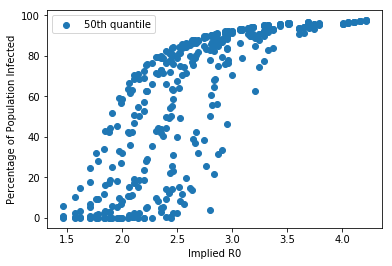

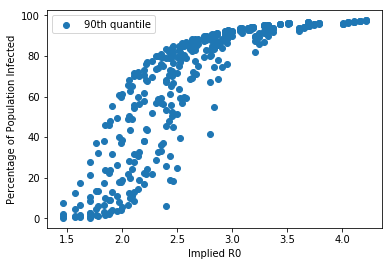

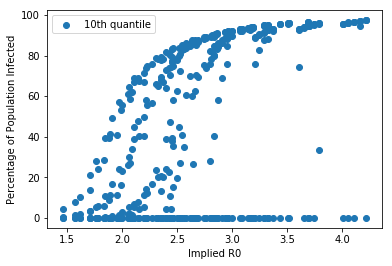

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(R0_seq, q50_seq, label="50th quantile")

plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()
plt.scatter(R0_seq, q90_seq, label="90th quantile")
plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()
plt.scatter(R0_seq, q10_seq, label="10th quantile")
plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()

In [ ]:
params['sever']

In [33]:
# R0 = (infections/contact) * (contact / time) * (time / infection)
def compute_implied_R0(params):
    infections_per_contact = params['exposed_infection_p']
    contacts_per_day = params['expected_contacts_per_day']
    p_asymptomatic = params['asymptomatic_p']
    days_per_infection = 2 + 3 + p_asymptomatic * 12 + (1 - p_asymptomatic) * 1/ params['severe_symptoms_daily_self_report_p']
    return days_per_infection * infections_per_contact * contacts_per_day

In [41]:
from multiparam_output_loader import MultiParamOutputLoader
loader2 = MultiParamOutputLoader("/nfs01/covid_sims//1591393437-multiparam")

In [50]:
R0_seq = []
q90_seq = []
q50_seq = []
q10_seq = []
params = loader2.scn_params['Fall Nominal (No Contact Tracing)']
for param_tuple in loader2.sim_results['Fall Nominal (No Contact Tracing)']:
    for param, val in zip(loader2.varying_params, param_tuple):
        if param == 'symptomatic_daily_self_report_p':
            param = 'severe_symptoms_daily_self_report_p'
        params[param] = val
    R0 = compute_implied_R0(params)
    #print("{} => R0 = {} ".format(param_tuple, R0))
    R0_seq.append(R0)
    
    q10, q50, q90 = cum_infection_quantiles(loader2.sim_results['Fall Nominal (No Contact Tracing)'][param_tuple], 0.1, 0.9)
    q10_seq.append(q10)
    q50_seq.append(q50)
    q90_seq.append(q90)
    

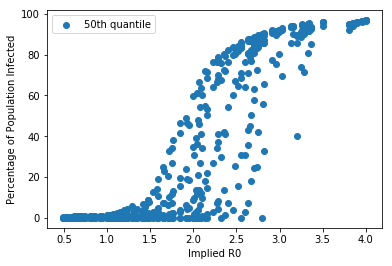

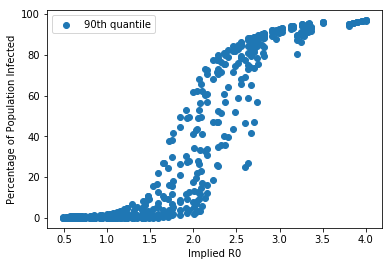

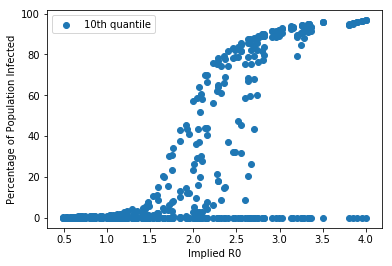

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(R0_seq, q50_seq, label="50th quantile")

plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()
plt.scatter(R0_seq, q90_seq, label="90th quantile")
plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()
plt.scatter(R0_seq, q10_seq, label="10th quantile")
plt.legend(loc='best')
plt.xlabel("Implied R0")
plt.ylabel("Percentage of Population Infected")
plt.show()